# 尋找粉專最佳發文時間

利用其中一個化妝品牌粉專的資料來判斷該粉專在一個禮拜的甚麼時候發文可以獲得最多關注

In [36]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import math

輸入資料

In [2]:
df = pd.read_csv("C:/Users/USER/python-homework/Facebook_metrics/dataset_Facebook.csv")

In [3]:
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


判斷資料中是否有空值

In [6]:
df.count()

Page total likes                                                       500
Type                                                                   500
Category                                                               500
Post Month                                                             500
Post Weekday                                                           500
Post Hour                                                              500
Paid                                                                   499
Lifetime Post Total Reach                                              500
Lifetime Post Total Impressions                                        500
Lifetime Engaged Users                                                 500
Lifetime Post Consumers                                                500
Lifetime Post Consumptions                                             500
Lifetime Post Impressions by people who have liked your Page           500
Lifetime Post reach by pe

缺值的項目剛好都可以用0來代替，直接視為0即可

In [7]:
df = df.fillna(0)

In [8]:
df.count()

Page total likes                                                       500
Type                                                                   500
Category                                                               500
Post Month                                                             500
Post Weekday                                                           500
Post Hour                                                              500
Paid                                                                   500
Lifetime Post Total Reach                                              500
Lifetime Post Total Impressions                                        500
Lifetime Engaged Users                                                 500
Lifetime Post Consumers                                                500
Lifetime Post Consumptions                                             500
Lifetime Post Impressions by people who have liked your Page           500
Lifetime Post reach by pe

簡單來找甚麼形式的文可以獲得最多喜歡和分享

<BarContainer object of 500 artists>

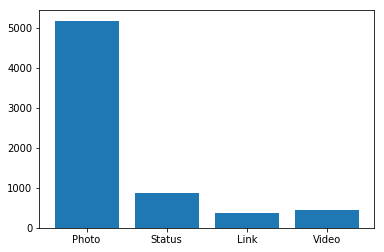

In [9]:
plt.bar(df["Type"],df["like"])

<BarContainer object of 500 artists>

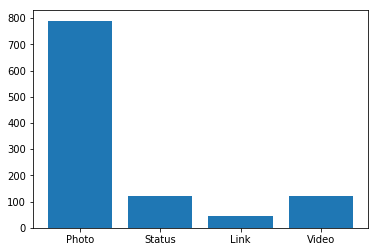

In [10]:
plt.bar(df["Type"],df["share"])

發現有一個值超出其他貼文許多，因此暫時忽略它來減少資料的錯誤性

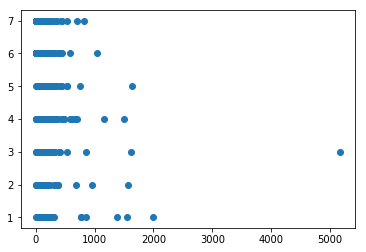

In [11]:
plt.scatter(df["like"],df['Post Weekday'])

In [12]:
df.loc[df.like == 5172]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334


In [13]:
df = df.drop(244)

資料整理完之後，可以知道有照片的貼文可以獲得比較多的喜歡

<BarContainer object of 499 artists>

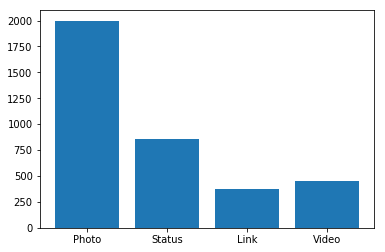

In [40]:
plt.bar(df["Type"],df["like"])

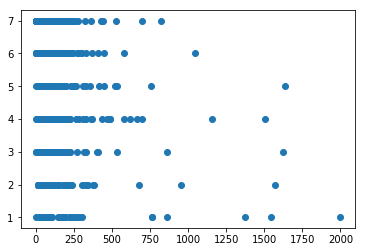

In [14]:
plt.scatter(df["like"],df['Post Weekday'])

接下來將有付費的貼文給分出來
避免資料有被其他因素影響

In [15]:
df_pay = df[df.Paid ==1 ]
df_nopay = df[df.Paid ==0]

In [16]:
df_nopay

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142
10,139441,Status,2,12,5,10,0.0,21744,42334,4258,4100,4540,37849,18952,3798,0,233.0,19.0,252
11,139441,Photo,2,12,5,10,0.0,3112,5590,208,127,145,3887,2174,165,0,88.0,18.0,106
12,139441,Photo,2,12,5,10,0.0,2847,5133,193,115,133,3779,2072,152,0,90.0,14.0,104


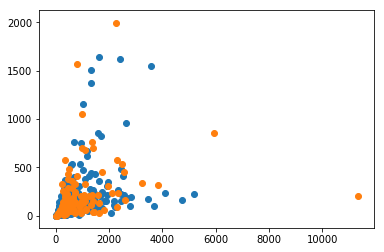

In [17]:
plt.scatter(df_nopay['Lifetime Post Consumers'],df_nopay["like"])
plt.scatter(df_pay['Lifetime Post Consumers'],df_pay["like"])

如何定義最佳發文的時間，
這邊拿看到貼文的人數和按讚的人數來做判斷，
因為看到貼文的人不一定是有意的，
因此這邊做一個簡單的加權

In [ ]:
df_pay["result"] = df_pay["Lifetime Post Consumers"]*0.3+0.5*df_pay["like"]
df_nopay["result"] = df_nopay["Lifetime Post Consumers"]*0.3+0.5*df_nopay["like"]

根據我們做的加權總合來做排列

In [19]:
df_nopay = df_nopay.sort_values(by='result', ascending=False)
df_pay = df_pay.sort_values(by='result', ascending=False)

In [20]:
df_nopay.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,result
460,92507,Photo,3,2,1,13,0.0,55520,665792,4544,3586,6624,648611,47488,3430,146,1546.0,181.0,1873,1848.8
38,138895,Status,2,12,7,9,0.0,17576,33058,5352,5202,6547,23135,11792,4104,11,227.0,31.0,269,1674.1
168,135428,Photo,1,9,3,10,0.0,41984,68290,3370,2420,4074,34802,20928,2126,144,1622.0,208.0,1974,1537.0
172,135195,Status,2,9,1,10,0.0,21256,41906,4840,4754,5906,35455,17592,4318,38,163.0,27.0,228,1507.7
10,139441,Status,2,12,5,10,0.0,21744,42334,4258,4100,4540,37849,18952,3798,0,233.0,19.0,252,1346.5


In [21]:
df_nopay.reset_index(inplace=True)

In [22]:
df_pay.reset_index(inplace=True)

In [55]:
df_nopay.head()

,index,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,...,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,result,color
0,460,92507,Photo,3,2,1,13,0.0,55520,665792,...,6624,648611,47488,3430,146,1546.0,181.0,1873,1848.8,r
1,38,138895,Status,2,12,7,9,0.0,17576,33058,...,6547,23135,11792,4104,11,227.0,31.0,269,1674.1,orange
2,168,135428,Photo,1,9,3,10,0.0,41984,68290,...,4074,34802,20928,2126,144,1622.0,208.0,1974,1537.0,y
3,172,135195,Status,2,9,1,10,0.0,21256,41906,...,5906,35455,17592,4318,38,163.0,27.0,228,1507.7,r
4,10,139441,Status,2,12,5,10,0.0,21744,42334,...,4540,37849,18952,3798,0,233.0,19.0,252,1346.5,c


# 開始判斷最佳發文時間

把付錢和沒有付錢的數據個取出前20項，來大略看看發文時間

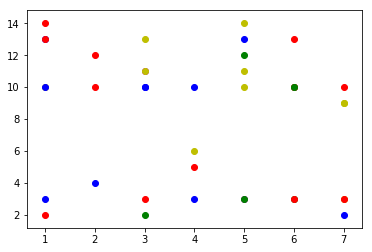

In [46]:
abc = {"Link":"r","Photo":"b", "Status":"y", "Video":"g"}
abcpay = {"Photo":"r", "Status":"g","Video":"m"}
for i in range(0,20):
    plt.scatter(df_nopay["Post Weekday"][i],df_nopay["Post Hour"][i],c = abc[df_nopay["Type"][i]],label = "nopay")
    plt.scatter(df_pay["Post Weekday"][i],df_pay["Post Hour"][i],c = abcpay[df_pay["Type"][i]],label = "pay")

發現不是很清楚，因此想試試看使用OLS來看看現性回歸，看看能不能找到甚麼

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     242.4
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           3.73e-42
Time:                        10:06:51   Log-Likelihood:                -2923.6
No. Observations:                 361   AIC:                             5849.
Df Residuals:                     360   BIC:                             5853.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.4314      0.156     15.570      0.0

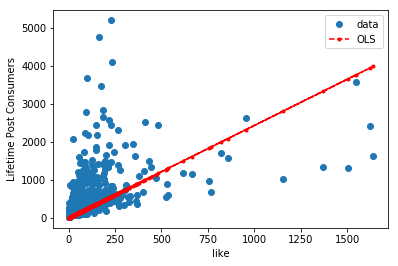

In [34]:
q = sm.OLS(np.array(df_nopay["Lifetime Post Consumers"]),np.array(df_nopay["like"]))

re = q.fit()

print(re.summary())

print(re.params)

y_fitted = re.fittedvalues

plt.plot(df_nopay["like"],df_nopay["Lifetime Post Consumers"], 'o', label='data')
plt.plot(df_nopay["like"], y_fitted, 'r--.',label='OLS')
plt.xlabel("like")
plt.ylabel("Lifetime Post Consumers")
plt.legend(loc='best')

目測其誤差有點大

In [37]:
lossF = 0
for i in range(0,len(y_fitted)):
    lossF = lossF +((math.fabs(df_nopay["Lifetime Post Consumers"][i]-y_fitted[i]))**2)/2


In [38]:
lossF

114375783.9699856

差值也非常大，因此決定改用其他方式來找我們要的答案

In [48]:
df_nopay["color"] = 1
df_pay["color"] = 1    

abc = {1:"r",2:"b", 3:"y", 4:"g",5:'c',6:"m",7:"orange"}
for a in range(0,len(df_nopay["Post Weekday"])):
    df_nopay["color"][a] = abc[df_nopay["Post Weekday"][a]]
for a in range(0,len(df_pay["Post Weekday"])):
    df_pay["color"][a] = abc[df_pay["Post Weekday"][a]]

D:\anaconda\envs\learn\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\anaconda\envs\learn\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


決定直接使用資料視覺化的方式來找出最佳值，
加一個禮拜7天各用一個顏色來代表，
並拿like數和星期幾和時間來呈現圖表

Text(0.5, 0, 'Post Hour')

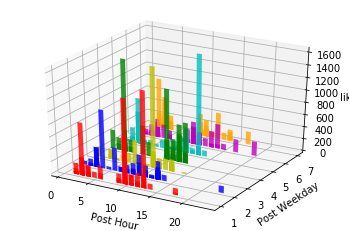

In [51]:
ax = plt.subplot(111, projection='3d')
ax.bar(np.array(df_nopay["Post Hour"]),np.array(df_nopay["like"]),np.array(df_nopay["Post Weekday"]),
       zdir='y',color = df_nopay["color"], alpha=0.8)
ax.set_zlabel("like")  # 坐标轴
ax.set_ylabel("Post Weekday")
ax.set_xlabel("Post Hour")

Text(0.5, 0, 'Post Hour')

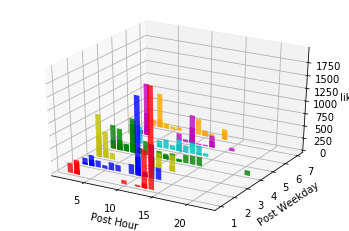

In [50]:
ax1 = plt.subplot(111, projection='3d')
ax1.bar(np.array(df_pay["Post Hour"]),np.array(df_pay["like"]),np.array(df_pay["Post Weekday"]),
       zdir='y',color = df_pay["color"], alpha=0.8)
ax1.set_zlabel("like")  # 坐标轴
ax1.set_ylabel("Post Weekday")
ax1.set_xlabel("Post Hour")

發現有付費的資料比較少，因此只探討沒有付錢的情況

Text(0.5, 0, 'Post Hour')

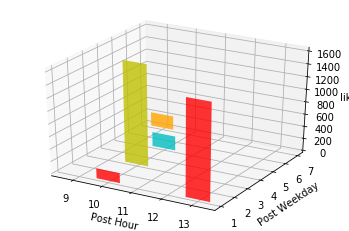

In [58]:
ax = plt.subplot(111, projection='3d')
ax.bar(np.array(df_nopay["Post Hour"][:5]),np.array(df_nopay["like"][:5]),np.array(df_nopay["Post Weekday"][:5]),
       zdir='y',color = df_nopay["color"][:5], alpha=0.8)
ax.set_zlabel("like")  # 坐标轴
ax.set_ylabel("Post Weekday")
ax.set_xlabel("Post Hour")

Text(0.5, 0, 'Post Hour')

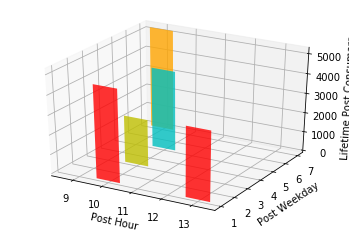

In [59]:
ax = plt.subplot(111, projection='3d')
ax.bar(np.array(df_nopay["Post Hour"][:5]),np.array(df_nopay["Lifetime Post Consumers"][:5]),np.array(df_nopay["Post Weekday"][:5]),
       zdir='y',color = df_nopay["color"][:5], alpha=0.8)
ax.set_zlabel("Lifetime Post Consumers")  # 坐标轴
ax.set_ylabel("Post Weekday")
ax.set_xlabel("Post Hour")

# 從最後兩張圖可以知道星期一下午13點po文可以拿到比較多的like數，和比較堆多的觀看數